<a href="https://colab.research.google.com/github/VictorCastelli/IA_102/blob/main/Parcial_2_IA_Con_Comparacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import os
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
!pip install keras
!pip install keras_applications --no-deps
!pip install split_folders

In [17]:
import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications import DenseNet201, ResNet152V2
from google.colab.patches import cv2_imshow
import cv2
import os
import pandas as pd
import splitfolders
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Resizing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [18]:
drive.mount('/content/drive')

ruta_directorio = "/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data"
salida_ruta = "/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva"

splitfolders.ratio(ruta_directorio, output=salida_ruta, seed=42, ratio=(.6, .2, .2))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Copying files: 5633 files [03:15, 28.89 files/s]


In [19]:
img_height,img_width=(224,224)
batch_size=32
train     = "/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/train"
validatio = "/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/test"
test      = "/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/val"

In [20]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 validation_split=0.4)
train_generator=train_datagen.flow_from_directory(
    train,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training")

valid_generator=train_datagen.flow_from_directory(
    validatio,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation")

test_generator=train_datagen.flow_from_directory(
    test,
    target_size=(img_height,img_width),
    batch_size=1,
    class_mode="categorical",
    subset="training")

Found 2027 images belonging to 5 classes.
Found 450 images belonging to 5 classes.
Found 676 images belonging to 5 classes.


In [21]:
base_model = ResNet152V2(weights='imagenet', include_top = False)
base_model.trainable = False
model = Sequential()
model.add(Resizing(224,224))
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation ='relu'))
model.add(Dense(5, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_generator,epochs=30)

Epoch 1/30
64/64 [==============================] - 51s 605ms/step - loss: 1.2188 - accuracy: 0.9304
Epoch 2/30
64/64 [==============================] - 39s 604ms/step - loss: 0.3899 - accuracy: 0.9768
Epoch 3/30
64/64 [==============================] - 38s 584ms/step - loss: 0.2084 - accuracy: 0.9842
Epoch 4/30
64/64 [==============================] - 38s 587ms/step - loss: 0.0903 - accuracy: 0.9916
Epoch 5/30
64/64 [==============================] - 37s 573ms/step - loss: 0.2128 - accuracy: 0.9877
Epoch 6/30
64/64 [==============================] - 39s 608ms/step - loss: 0.1530 - accuracy: 0.9882
Epoch 7/30
64/64 [==============================] - 38s 588ms/step - loss: 0.0952 - accuracy: 0.9916
Epoch 8/30
64/64 [==============================] - 38s 597ms/step - loss: 0.3198 - accuracy: 0.9906
Epoch 9/30
64/64 [==============================] - 38s 590ms/step - loss: 0.1215 - accuracy: 0.9921
Epoch 10/30
64/64 [==============================] - 37s 563ms/step - loss: 0.2938 - accura

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, None)    0         
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048   58331648  
                             )                                   
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_5 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 161098245 (614.54 MB)
Trainable params: 102766597 (392.02 MB)
Non-trainable params: 58331648 (222.52 MB)
_

In [23]:
model.save("/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/Modelo_ResNet152V2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
base_model2 = DenseNet201(weights='imagenet', include_top = False)
base_model2.trainable = False
model2 = Sequential()
model2.add(Resizing(224,224))
model2.add(base_model2)
model2.add(Flatten())
model2.add(Dense(1024, activation ='relu'))
model2.add(Dense(5, activation = 'softmax'))
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
model2.fit(train_generator,epochs=30)

Epoch 1/30
64/64 [==============================] - 54s 544ms/step - loss: 3.0737 - accuracy: 0.8614
Epoch 2/30
64/64 [==============================] - 34s 538ms/step - loss: 0.2094 - accuracy: 0.9793
Epoch 3/30
64/64 [==============================] - 36s 560ms/step - loss: 0.1417 - accuracy: 0.9813
Epoch 4/30
64/64 [==============================] - 33s 517ms/step - loss: 0.1124 - accuracy: 0.9887
Epoch 5/30
64/64 [==============================] - 35s 538ms/step - loss: 0.0812 - accuracy: 0.9896
Epoch 6/30
64/64 [==============================] - 34s 521ms/step - loss: 0.1110 - accuracy: 0.9877
Epoch 7/30
64/64 [==============================] - 36s 561ms/step - loss: 0.0284 - accuracy: 0.9970
Epoch 8/30
64/64 [==============================] - 33s 519ms/step - loss: 0.0710 - accuracy: 0.9946
Epoch 9/30
64/64 [==============================] - 36s 561ms/step - loss: 0.0898 - accuracy: 0.9916
Epoch 10/30
64/64 [==============================] - 33s 508ms/step - loss: 0.0494 - accura

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, None)    0         
                                                                 
 resnet152v2 (Functional)    (None, None, None, 2048   58331648  
                             )                                   
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 1024)              102761472 
                                                                 
 dense_5 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 161098245 (614.54 MB)
Trainable params: 102766597 (392.02 MB)
Non-trainable params: 58331648 (222.52 MB)
_

In [26]:
model.save("/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/Modelo_DenseNet201.h5")

In [29]:
from tensorflow.keras.models import load_model

model1 = load_model("/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/Modelo_ResNet152V2")
model2 = load_model("/content/drive/MyDrive/UTEC/9_IA/2_Parcial_2/archive/data/nueva/Modelo_DenseNet201")


1/1 [==============================] - 0s 46ms/step


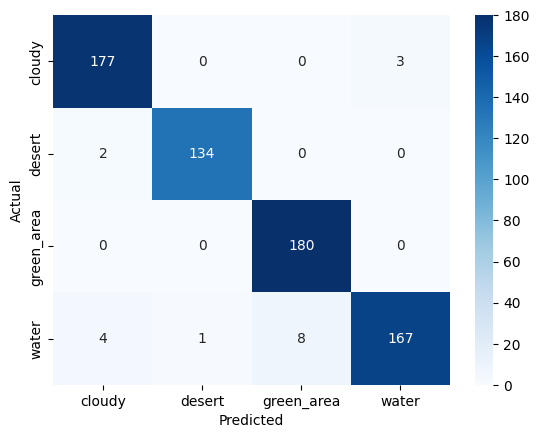

test accuracy: Predicted
cloudy        359.562842
desert        487.407407
green_area    350.000000
water         387.058824
dtype: float64


In [37]:
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test=test_generator.next()
  y_prob.append(model1.predict(X_test))
  y_act.append(Y_test)

predicted_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=["predicted_class","actual_class"])
confusion_matrix=pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actual"],colnames=["Predicted"])

sn.heatmap(confusion_matrix,cmap="Blues",annot=True,fmt="d")
plt.show()
print("test accuracy: {}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))

1/1 [==============================] - 0s 42ms/step


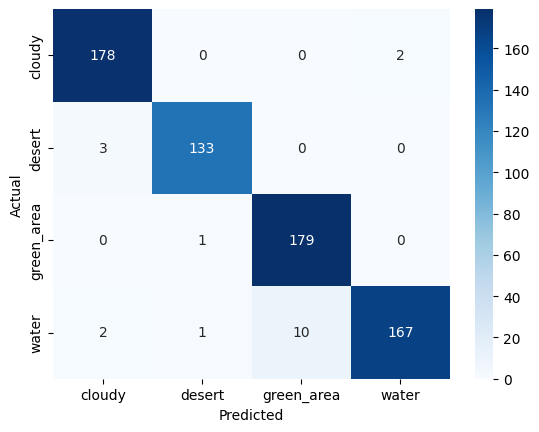

test accuracy: Predicted
cloudy        359.016393
desert        486.666667
green_area    347.619048
water         388.757396
dtype: float64


In [38]:
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test=test_generator.next()
  y_prob.append(model2.predict(X_test))
  y_act.append(Y_test)

predicted_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()]for i in y_act]

out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=["predicted_class","actual_class"])
confusion_matrix=pd.crosstab(out_df["actual_class"],out_df["predicted_class"],rownames=["Actual"],colnames=["Predicted"])

sn.heatmap(confusion_matrix,cmap="Blues",annot=True,fmt="d")
plt.show()
print("test accuracy: {}".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))